https://www.youtube.com/watch?v=ikt0sny_ImY

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report



In [99]:




iris = datasets.load_iris()
X = scale(iris.data)
Y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10,]
print(variable_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Building and running model

In [100]:
clustering = KMeans(n_clusters=3, random_state=5, n_init=10)
clustering.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=5)

Plotting output

In [101]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']
Y.columns = ["Targets"]
iris_df

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0.5, 1.0, 'K-Means Class')

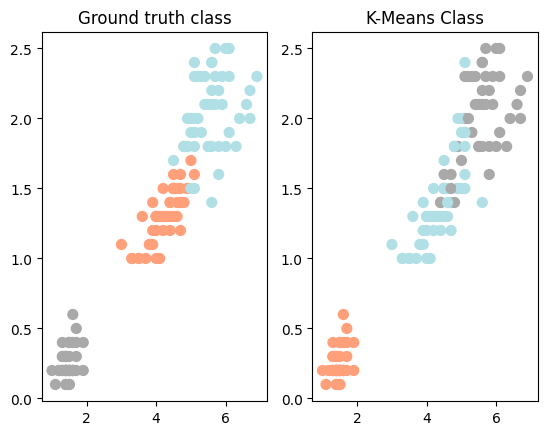

In [102]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_length, y=iris_df.Petal_width, c=color_theme[iris.target],s=50)

plt.title('Ground truth class')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_length, y=iris_df.Petal_width, c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Class')


Text(0.5, 1.0, 'K-Means Class')

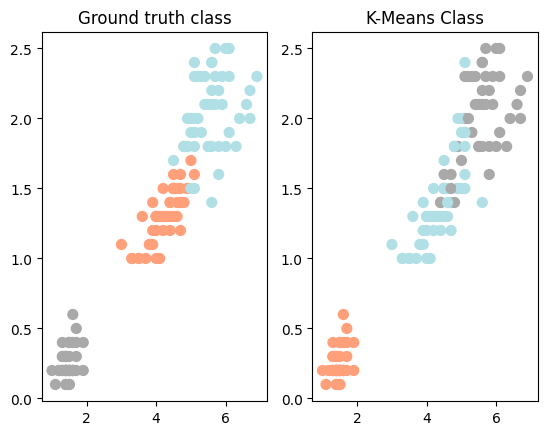

In [103]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_length, y=iris_df.Petal_width, c=color_theme[iris.target],s=50)
plt.title('Ground truth class')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_length, y=iris_df.Petal_width, c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Class')

In [104]:


print(classification_report(Y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

